# Implementing MLP with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
print(f'Tensorflow: {tf.__version__}')
print(f'Keras: {keras.__version__}')

Tensorflow: 2.9.0
Keras: 2.9.0


## Retrieve Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [5]:
import matplotlib.pyplot as plt

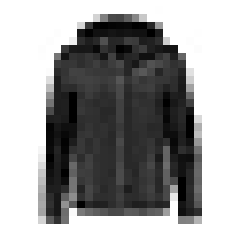

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden_1 = model.layers[1]

In [14]:
hidden_1.name

'dense'

In [15]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
model.get_layer("dense") is hidden_1

True

In [17]:
weights, biases = hidden_1.get_weights()

In [18]:
weights

array([[-0.01134795, -0.00675106, -0.05229093, ..., -0.00418186,
        -0.0598775 ,  0.07106587],
       [-0.06409153,  0.06776159, -0.02407165, ...,  0.04460551,
         0.01744158,  0.05997975],
       [ 0.03930804,  0.04812739, -0.05321988, ...,  0.01309039,
        -0.06734356, -0.04260853],
       ...,
       [ 0.02149198, -0.05270053, -0.03208856, ..., -0.07283658,
         0.0736753 , -0.00592466],
       [-0.01340818,  0.05039493,  0.01156279, ..., -0.02094003,
        -0.01815743, -0.04891075],
       [-0.0362381 ,  0.0325959 ,  0.00557808, ..., -0.05187834,
        -0.01060393, -0.06449775]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",#keras.optimizers.SGD(lr=0.01)
    metrics=["accuracy"]
)

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7263 - accuracy: 0.7650 - val_loss: 0.5224 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4863 - accuracy: 0.8310 - val_loss: 0.4471 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4407 - accuracy: 0.8459 - val_loss: 0.4128 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4137 - accuracy: 0.8548 - val_loss: 0.4182 - val_accuracy: 0.8520
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3927 - accuracy: 0.8610 - val_loss: 0.3862 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8671 - val_loss: 0.3720 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3659 - accuracy: 0.8703 - val_loss: 0.3684 - val_accuracy:

In [24]:
import pandas as pd

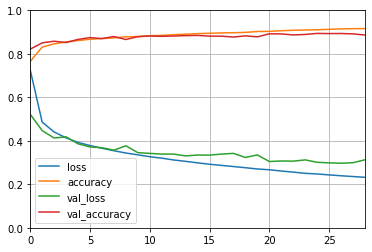

In [25]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df)
plt.grid(True)
plt.gca().set_ylim(0, 1)# set vertical range to [0-1]
plt.gca().set_xlim(0, 28)
plt.legend(history_df.keys())
plt.show()

## Creating Regression MLP

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8849


[0.3316359221935272, 0.8848999738693237]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 164ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
import numpy as np
np.argmax(y_proba, axis=1)

array([9, 2, 1], dtype=int64)

## Building a Regression MLP Using the Sequential API

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(
    loss="mean_squared_error",
    optimizer="sgd"
)

In [31]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4159 - val_loss: 0.5101
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4409 - val_loss: 0.4350
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4100 - val_loss: 0.4258
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3930 - val_loss: 0.4092
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3984 - val_loss: 0.4048
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3985 - val_loss: 0.4213
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3803 - val_loss: 0.4035
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3712 - val_loss: 0.3949
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3673 - val_loss: 0.3892
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3692 - val_loss: 0.3836

In [32]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3743


## Building Complex Models using the Functional API

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [34]:
model.compile(
    loss="mean_squared_error",
    optimizer="sgd"
)

In [35]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7085 - val_loss: 0.5841
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7872 - val_loss: 0.5075
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4764 - val_loss: 0.4762
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4526 - val_loss: 0.4566
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4316 - val_loss: 0.4452
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4156 - val_loss: 0.4442
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4485 - val_loss: 0.4259
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4005 - val_loss: 0.4168
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3931 - val_loss: 0.4028
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5511 - val_loss: 0.3999

In [36]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3335


In [37]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [38]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:, :3], X_test_B[:, :3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4407 - val_loss: 1.1166
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8617 - val_loss: 0.7973
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7074 - val_loss: 0.7187
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6562 - val_loss: 0.6774
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6267 - val_loss: 0.6521
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6070 - val_loss: 0.6318
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5899 - val_loss: 0.6158
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5745 - val_loss: 0.6010
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5613 - val_loss: 0.5873
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5521 - val_loss: 0.5763

In [39]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4824
